Prepare rules for the all the data sets <br>
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values<br>
2) Change the minimum length in apriori algorithm<br>
3) Visulize the obtained rules using different plots <br>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
import plotly.express as px
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [5]:
movies_data = pd.read_csv("my_movies.csv")
movies_data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [6]:
movies_data.isnull().any().any()

True

In [10]:
movies_data.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

##### Data preprocessing

In [11]:
data=movies_data.drop(['V1', 'V2', 'V3', 'V4', 'V5'], axis = 1)
data.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [12]:
data.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
popularity = []
for i in data.columns.values:
    popularity.append(sum(data[i]))
    

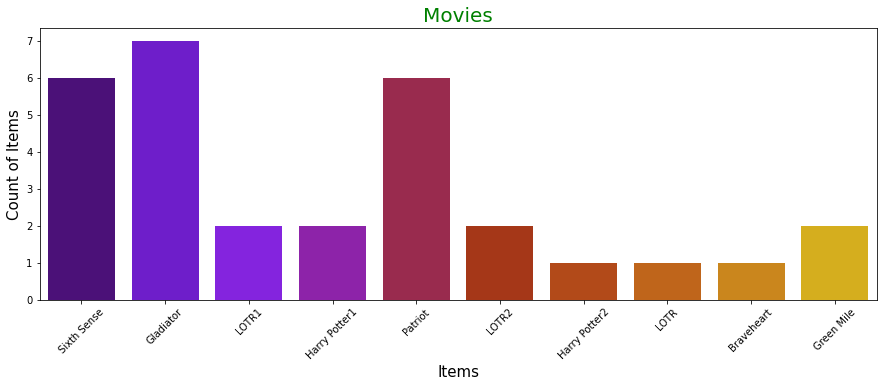

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x = data.columns.values, y = popularity, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Movies', color = 'green', size = 20)
plt.show()

In [16]:
!pip install wordcloud

  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)


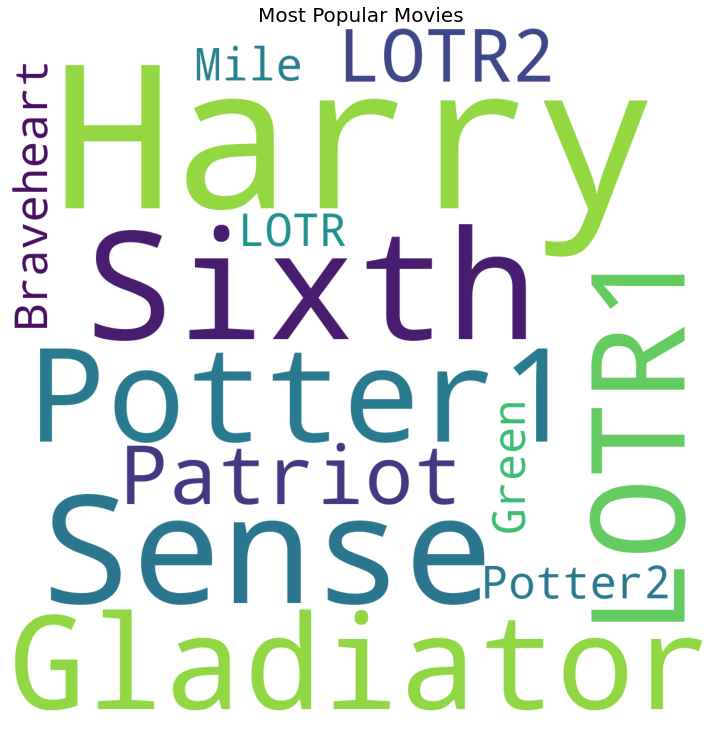

In [15]:

# Word cloud of most frequent books
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Movies',fontsize = 20)
plt.show()

#### Minimum Support 0.1

In [16]:
# minimum support = 0.1
frequent_itemsets4 = apriori(data, min_support=0.1, use_colnames=True)
frequent_itemsets4['length'] = frequent_itemsets4['itemsets'].apply(lambda x: len(x))
frequent_itemsets4

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [27]:
rules4 = association_rules(frequent_itemsets4, metric="confidence", min_threshold=1)
rules4.sort_values('confidence', ascending = False, inplace = True)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
79,"(Green Mile, Sixth Sense, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.000000,0.08,inf
92,"(Harry Potter1, LOTR2)","(Green Mile, Sixth Sense)",0.1,0.2,0.1,1.0,5.000000,0.08,inf
91,"(Sixth Sense, LOTR2)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
90,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
37,"(Gladiator, LOTR)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf
36,"(Green Mile, LOTR)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
35,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.000000,0.09,inf
34,(Braveheart),"(Gladiator, Patriot)",0.1,0.6,0.1,1.0,1.666667,0.04,inf


In [28]:
rules4["antecedents"].apply(lambda x: str(x))
cols = ['antecedents','consequents']
rules4[cols] = rules4[cols].applymap(lambda x: tuple(x))
rules4


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(LOTR,)","(Sixth Sense,)",0.1,0.6,0.1,1.0,1.666667,0.04,inf
79,"(Green Mile, Sixth Sense, LOTR2)","(LOTR1,)",0.1,0.2,0.1,1.0,5.000000,0.08,inf
92,"(Harry Potter1, LOTR2)","(Green Mile, Sixth Sense)",0.1,0.2,0.1,1.0,5.000000,0.08,inf
91,"(Sixth Sense, LOTR2)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
90,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
37,"(Gladiator, LOTR)","(Green Mile,)",0.1,0.2,0.1,1.0,5.000000,0.08,inf
36,"(Green Mile, LOTR)","(Gladiator,)",0.1,0.7,0.1,1.0,1.428571,0.03,inf
35,"(Green Mile, Gladiator)","(LOTR,)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
34,"(Braveheart,)","(Gladiator, Patriot)",0.1,0.6,0.1,1.0,1.666667,0.04,inf


In [44]:
rules4["movie_group"] = rules4["antecedents"].apply(lambda x: str(x)) + "," + rules4["consequents"].apply(lambda x: str(x))
df1 = rules4.loc[:,["movie_group","confidence","lift"]].sort_values("confidence",ascending=False)
df1

,movie_group,confidence,lift
0,"('LOTR',),('Sixth Sense',)",1.0,1.666667
61,"('Sixth Sense', 'Harry Potter1', 'LOTR2'),('LO...",1.0,5.000000
2,"('Patriot',),('Gladiator',)",1.0,1.428571
3,"('LOTR',),('Gladiator',)",1.0,1.428571
4,"('Braveheart',),('Gladiator',)",1.0,1.428571
...,...,...,...
120,"('Harry Potter1', 'LOTR2'),('LOTR1', 'Sixth Se...",1.0,10.000000
121,"('Sixth Sense', 'Harry Potter1'),('LOTR1', 'Gr...",1.0,10.000000
122,"('Green Mile', 'Harry Potter1'),('LOTR1', 'Six...",1.0,10.000000
123,"('Sixth Sense', 'LOTR2'),('LOTR1', 'Harry Pott...",1.0,10.000000


<AxesSubplot:>

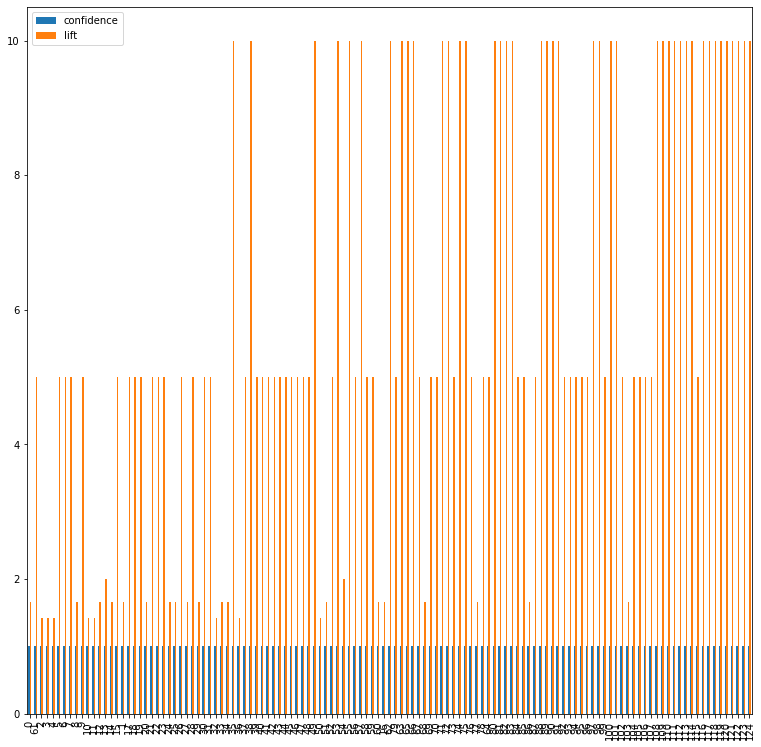

In [45]:
df1.plot.bar()

#####  A leverage value of 0 indicates independence. Range will be [-1 1]<br>A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [46]:
fig=px.scatter(rules4['support'], rules4['confidence'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="confidence",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Confidence')
    
)
fig.update_layout(hovermode='x unified')
fig.show()

In [47]:
fig=px.scatter(df1['confidence'], df1['lift'])
fig.update_layout(
    xaxis_title="confidence",
    yaxis_title="lift",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('confidence vs lift')
    
)
fig.update_layout(hovermode='x unified')
fig.show()

In [48]:
fig=px.scatter(rules4['support'], rules4['lift'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="lift",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Lift')
    
)
fig.update_layout(hovermode='x unified')
fig.show()

Text(0.5, 1.0, 'lift vs Confidence')

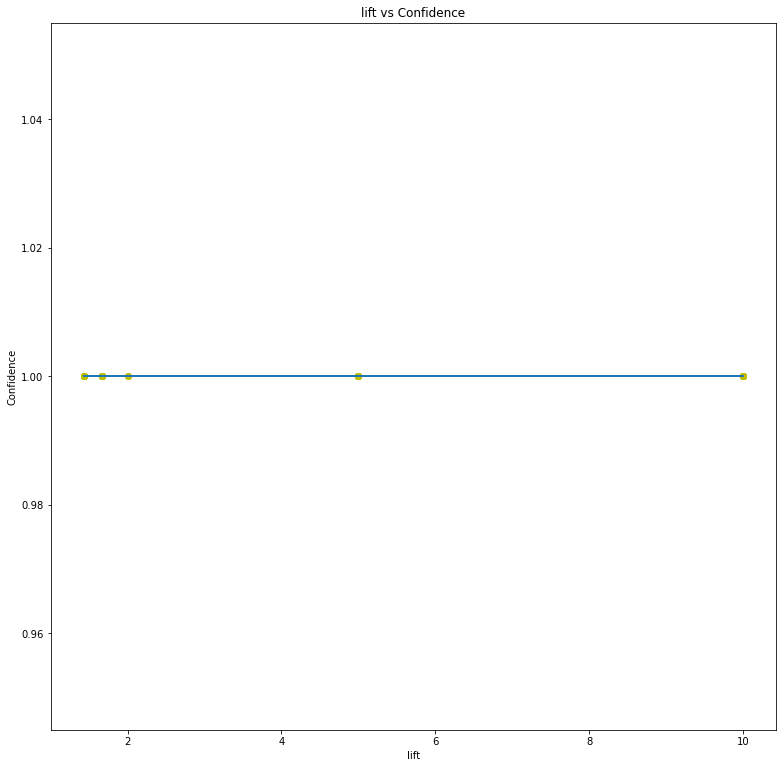

In [49]:
fit = np.polyfit(rules4['lift'], rules4['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules4['lift'], rules4['confidence'], 'yo', rules4['lift'], 
fit_fn(rules4['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

<b>Support</b> is an indication of how frequently the item set appears in the data set.<br><br><b>Confidence</b>For a rule X⇒Y, confidence shows the percentage in which Y is bought with X.<br><br><b>The lift</b> of a rule is the ratio of the observed support to that expected if X and Y were independent.<br>Greater lift values indicate stronger associations.<br><br><b>Conviction</b> can be interpreted as the ratio of the expected frequency that X occurs without Y if X and Y were independent divided by the observed frequency of incorrect predictions. A high value means that the consequent depends strongly on the antecedent.

In [50]:
df1.head()

,movie_group,confidence,lift
0,"('LOTR',),('Sixth Sense',)",1.0,1.666667
61,"('Sixth Sense', 'Harry Potter1', 'LOTR2'),('LO...",1.0,5.000000
2,"('Patriot',),('Gladiator',)",1.0,1.428571
3,"('LOTR',),('Gladiator',)",1.0,1.428571
4,"('Braveheart',),('Gladiator',)",1.0,1.428571


In [52]:
df1.movie_group.to_list()[0].replace("(","").replace(")","").replace(",","").replace("''"," + ").replace("'","")

'LOTR + Sixth Sense'

In [54]:
products = []
for i in df1.movie_group.to_list():
    #print(i)
    products.append(i.replace("(","").replace(")","").replace(",","").replace("''","+").replace("'","").replace(" ", "+").replace("+", " + ")) 

In [55]:
df1["movies"] = products
df1

,movie_group,confidence,lift,movies
0,"('LOTR',),('Sixth Sense',)",1.0,1.666667,LOTR + Sixth + Sense
61,"('Sixth Sense', 'Harry Potter1', 'LOTR2'),('LO...",1.0,5.000000,Sixth + Sense + Harry + Potter1 + LOTR2 + LOTR1
2,"('Patriot',),('Gladiator',)",1.0,1.428571,Patriot + Gladiator
3,"('LOTR',),('Gladiator',)",1.0,1.428571,LOTR + Gladiator
4,"('Braveheart',),('Gladiator',)",1.0,1.428571,Braveheart + Gladiator
...,...,...,...,...
120,"('Harry Potter1', 'LOTR2'),('LOTR1', 'Sixth Se...",1.0,10.000000,Harry + Potter1 + LOTR2 + LOTR1 + Sixth + Sens...
121,"('Sixth Sense', 'Harry Potter1'),('LOTR1', 'Gr...",1.0,10.000000,Sixth + Sense + Harry + Potter1 + LOTR1 + Gree...
122,"('Green Mile', 'Harry Potter1'),('LOTR1', 'Six...",1.0,10.000000,Green + Mile + Harry + Potter1 + LOTR1 + Sixth...
123,"('Sixth Sense', 'LOTR2'),('LOTR1', 'Harry Pott...",1.0,10.000000,Sixth + Sense + LOTR2 + LOTR1 + Harry + Potter...


In [56]:
position=[]
for i in df1.index.values:
    position.append(int(i+1))
    
df1["pos"] = position
df1

,movie_group,confidence,lift,movies,pos
0,"('LOTR',),('Sixth Sense',)",1.0,1.666667,LOTR + Sixth + Sense,1
61,"('Sixth Sense', 'Harry Potter1', 'LOTR2'),('LO...",1.0,5.000000,Sixth + Sense + Harry + Potter1 + LOTR2 + LOTR1,62
2,"('Patriot',),('Gladiator',)",1.0,1.428571,Patriot + Gladiator,3
3,"('LOTR',),('Gladiator',)",1.0,1.428571,LOTR + Gladiator,4
4,"('Braveheart',),('Gladiator',)",1.0,1.428571,Braveheart + Gladiator,5
...,...,...,...,...,...
120,"('Harry Potter1', 'LOTR2'),('LOTR1', 'Sixth Se...",1.0,10.000000,Harry + Potter1 + LOTR2 + LOTR1 + Sixth + Sens...,121
121,"('Sixth Sense', 'Harry Potter1'),('LOTR1', 'Gr...",1.0,10.000000,Sixth + Sense + Harry + Potter1 + LOTR1 + Gree...,122
122,"('Green Mile', 'Harry Potter1'),('LOTR1', 'Six...",1.0,10.000000,Green + Mile + Harry + Potter1 + LOTR1 + Sixth...,123
123,"('Sixth Sense', 'LOTR2'),('LOTR1', 'Harry Pott...",1.0,10.000000,Sixth + Sense + LOTR2 + LOTR1 + Harry + Potter...,124


##### Minimum support =0.1 , minimum threshold = 0.5

In [57]:
# minimum support = 0.1
frequent_itemsets3 = apriori(data, min_support=0.1, use_colnames=True)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))


In [58]:
rules3 = association_rules(frequent_itemsets3, metric="confidence", min_threshold=0.5)
rules3.sort_values('confidence', ascending = False, inplace = True)
rules3



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
152,"(LOTR1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
79,"(Braveheart, Gladiator)",(Patriot),0.1,0.6,0.1,1.0,1.666667,0.04,inf
92,"(LOTR1, Green Mile)",(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf
174,"(LOTR1, Green Mile, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf
175,"(LOTR1, Harry Potter1, LOTR2)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf
...,...,...,...,...,...,...,...,...,...
76,(Green Mile),"(Sixth Sense, LOTR)",0.2,0.1,0.1,0.5,5.000000,0.08,1.8
73,"(Green Mile, Sixth Sense)",(LOTR),0.2,0.1,0.1,0.5,5.000000,0.08,1.8
72,(LOTR2),"(Green Mile, Sixth Sense)",0.2,0.2,0.1,0.5,2.500000,0.06,1.6
71,(Green Mile),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.5,5.000000,0.08,1.8


In [59]:
rules3["antecedents"].apply(lambda x: str(x))
cols = ['antecedents','consequents']
rules3[cols] = rules3[cols].applymap(lambda x: tuple(x))
rules3


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
152,"(LOTR1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
79,"(Braveheart, Gladiator)","(Patriot,)",0.1,0.6,0.1,1.0,1.666667,0.04,inf
92,"(LOTR1, Green Mile)","(Harry Potter1,)",0.1,0.2,0.1,1.0,5.000000,0.08,inf
174,"(LOTR1, Green Mile, LOTR2)","(Harry Potter1,)",0.1,0.2,0.1,1.0,5.000000,0.08,inf
175,"(LOTR1, Harry Potter1, LOTR2)","(Green Mile,)",0.1,0.2,0.1,1.0,5.000000,0.08,inf
...,...,...,...,...,...,...,...,...,...
76,"(Green Mile,)","(Sixth Sense, LOTR)",0.2,0.1,0.1,0.5,5.000000,0.08,1.8
73,"(Green Mile, Sixth Sense)","(LOTR,)",0.2,0.1,0.1,0.5,5.000000,0.08,1.8
72,"(LOTR2,)","(Green Mile, Sixth Sense)",0.2,0.2,0.1,0.5,2.500000,0.06,1.6
71,"(Green Mile,)","(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.5,5.000000,0.08,1.8


In [65]:

rules3["movie_group"] = rules3["antecedents"].apply(lambda x: str(x)) + "," + rules3["consequents"].apply(lambda x: str(x))
df1 = rules3.loc[:,["movie_group","confidence","lift"]].sort_values("confidence",ascending=False)

df1


,movie_group,confidence,lift
152,"('LOTR1', 'Sixth Sense'),('Green Mile', 'LOTR2')",1.0,10.0
16,"('LOTR1',),('LOTR2',)",1.0,5.0
151,"('LOTR1', 'Green Mile'),('Sixth Sense', 'LOTR2')",1.0,10.0
150,"('Green Mile', 'Sixth Sense', 'LOTR2'),('LOTR1',)",1.0,5.0
149,"('LOTR1', 'Sixth Sense', 'LOTR2'),('Green Mile',)",1.0,5.0
...,...,...,...
55,"('Green Mile', 'Sixth Sense'),('LOTR1',)",0.5,2.5
56,"('LOTR1',),('Green Mile', 'Sixth Sense')",0.5,2.5
57,"('Green Mile',),('LOTR1', 'Sixth Sense')",0.5,5.0
61,"('Harry Potter1',),('Sixth Sense', 'LOTR2')",0.5,5.0


<AxesSubplot:>

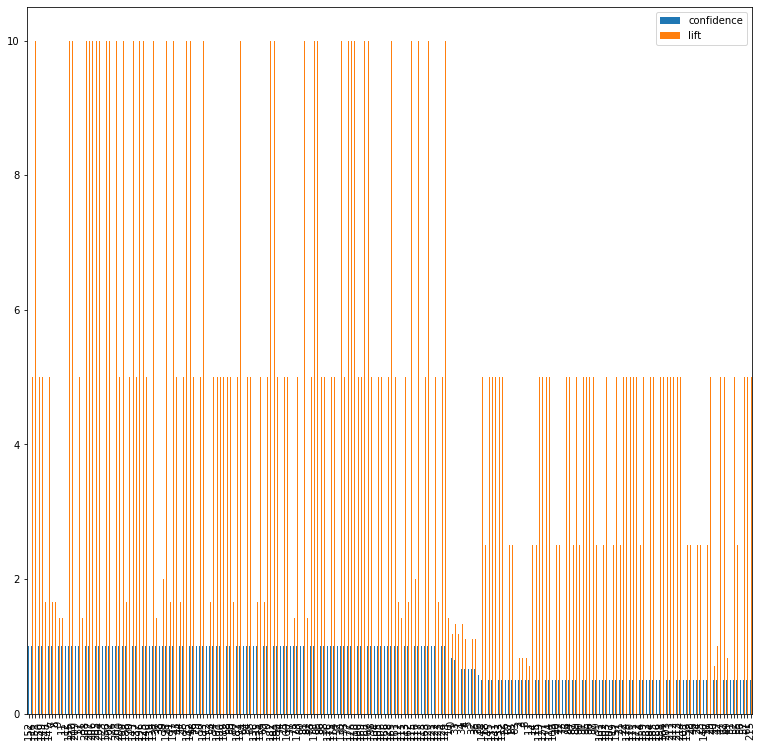

In [66]:
df1.plot.bar()



                                           movie_group  confidence  lift
152   ('LOTR1', 'Sixth Sense'),('Green Mile', 'LOTR2')         1.0  10.0
16                               ('LOTR1',),('LOTR2',)         1.0   5.0
151   ('LOTR1', 'Green Mile'),('Sixth Sense', 'LOTR2')         1.0  10.0
150  ('Green Mile', 'Sixth Sense', 'LOTR2'),('LOTR1',)         1.0   5.0
149  ('LOTR1', 'Sixth Sense', 'LOTR2'),('Green Mile',)         1.0   5.0


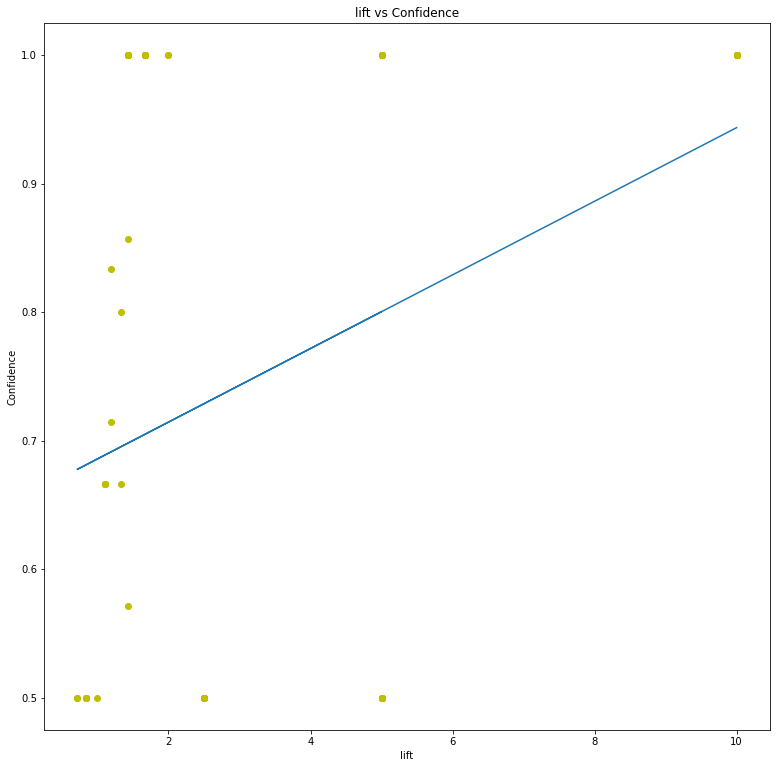

In [67]:
#####  A leverage value of 0 indicates independence. Range will be [-1 1]<br>A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

fig=px.scatter(rules3['support'], rules3['confidence'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="confidence",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Confidence')
    
)
fig.update_layout(hovermode='x unified')
fig.show()

fig=px.scatter(df1['confidence'], df1['lift'])
fig.update_layout(
    xaxis_title="confidence",
    yaxis_title="lift",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('confidence vs lift')
    
)
fig.update_layout(hovermode='x unified')
fig.show()

fig=px.scatter(rules3['support'], rules3['lift'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="lift",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Lift')
    
)
fig.update_layout(hovermode='x unified')
fig.show()

fit = np.polyfit(rules3['lift'], rules3['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules3['lift'], rules3['confidence'], 'yo', rules3['lift'], 
fit_fn(rules3['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')


print(df1.head())



In [70]:
df1.movie_group.to_list()[0].replace("(","").replace(")","").replace(",","").replace("''"," + ").replace("'","")

movies_ = []
for i in df1.movie_group.to_list():
    #print(i)
    movies_.append(i.replace("(","").replace(")","").replace(",","").replace("''","+").replace("'","").replace(" ", "+").replace("+", " + ")) 

df1["movies"] = movies_
print(df1)

position=[]
for i in df1.index.values:
    position.append(int(i+1))
    
df1["pos"] = position


                                           movie_group  confidence  lift  \
152   ('LOTR1', 'Sixth Sense'),('Green Mile', 'LOTR2')         1.0  10.0   
16                               ('LOTR1',),('LOTR2',)         1.0   5.0   
151   ('LOTR1', 'Green Mile'),('Sixth Sense', 'LOTR2')         1.0  10.0   
150  ('Green Mile', 'Sixth Sense', 'LOTR2'),('LOTR1',)         1.0   5.0   
149  ('LOTR1', 'Sixth Sense', 'LOTR2'),('Green Mile',)         1.0   5.0   
..                                                 ...         ...   ...   
55            ('Green Mile', 'Sixth Sense'),('LOTR1',)         0.5   2.5   
56            ('LOTR1',),('Green Mile', 'Sixth Sense')         0.5   2.5   
57            ('Green Mile',),('LOTR1', 'Sixth Sense')         0.5   5.0   
61         ('Harry Potter1',),('Sixth Sense', 'LOTR2')         0.5   5.0   
215  ('Green Mile',),('LOTR1', 'Sixth Sense', 'Harr...         0.5   5.0   

                                                movies  pos  
152       LOTR1 + Sixth +

In [71]:
df1

,movie_group,confidence,lift,movies,pos
152,"('LOTR1', 'Sixth Sense'),('Green Mile', 'LOTR2')",1.0,10.0,LOTR1 + Sixth + Sense + Green + Mile + LOTR2,153
16,"('LOTR1',),('LOTR2',)",1.0,5.0,LOTR1 + LOTR2,17
151,"('LOTR1', 'Green Mile'),('Sixth Sense', 'LOTR2')",1.0,10.0,LOTR1 + Green + Mile + Sixth + Sense + LOTR2,152
150,"('Green Mile', 'Sixth Sense', 'LOTR2'),('LOTR1',)",1.0,5.0,Green + Mile + Sixth + Sense + LOTR2 + LOTR1,151
149,"('LOTR1', 'Sixth Sense', 'LOTR2'),('Green Mile',)",1.0,5.0,LOTR1 + Sixth + Sense + LOTR2 + Green + Mile,150
...,...,...,...,...,...
55,"('Green Mile', 'Sixth Sense'),('LOTR1',)",0.5,2.5,Green + Mile + Sixth + Sense + LOTR1,56
56,"('LOTR1',),('Green Mile', 'Sixth Sense')",0.5,2.5,LOTR1 + Green + Mile + Sixth + Sense,57
57,"('Green Mile',),('LOTR1', 'Sixth Sense')",0.5,5.0,Green + Mile + LOTR1 + Sixth + Sense,58
61,"('Harry Potter1',),('Sixth Sense', 'LOTR2')",0.5,5.0,Harry + Potter1 + Sixth + Sense + LOTR2,62


In [75]:
# minimum support = 0.1
frequent_itemsets2 = apriori(data, min_support=0.15, use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))


rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.4)
rules2.sort_values('confidence', ascending = False, inplace = True)
rules2





,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
11,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [76]:
rules2["antecedents"].apply(lambda x: str(x))
cols = ['antecedents','consequents']
rules2[cols] = rules2[cols].applymap(lambda x: tuple(x))
rules2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,"(Green Mile,)","(Sixth Sense,)",0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,"(Patriot,)","(Gladiator,)",0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,"(LOTR1,)","(LOTR2,)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,"(LOTR2,)","(LOTR1,)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Patriot)","(Gladiator,)",0.4,0.7,0.4,1.000000,1.428571,0.12,inf
6,"(Gladiator,)","(Patriot,)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
0,"(Sixth Sense,)","(Gladiator,)",0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
11,"(Sixth Sense, Gladiator)","(Patriot,)",0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
1,"(Gladiator,)","(Sixth Sense,)",0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,"(Sixth Sense,)","(Patriot,)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [77]:
rules2["movie_group"] = rules2["antecedents"].apply(lambda x: str(x)) + "," + rules3["consequents"].apply(lambda x: str(x))
df1 = rules2.loc[:,["movie_group","confidence","lift"]].sort_values("confidence",ascending=False)

df1



,movie_group,confidence,lift
4,"('Green Mile',),('Patriot',)",1.000000,1.666667
5,"('Patriot',),('Sixth Sense',)",1.000000,1.428571
7,"('LOTR1',),('Sixth Sense',)",1.000000,5.000000
8,"('LOTR2',),('Sixth Sense',)",1.000000,5.000000
9,"('Sixth Sense', 'Patriot'),('Gladiator',)",1.000000,1.428571
6,"('Gladiator',),('Sixth Sense',)",0.857143,1.428571
0,"('Sixth Sense',),('Gladiator',)",0.833333,1.190476
11,"('Sixth Sense', 'Gladiator'),('Gladiator',)",0.800000,1.333333
1,"('Gladiator',),('Sixth Sense',)",0.714286,1.190476
2,"('Sixth Sense',),('Sixth Sense',)",0.666667,1.111111


In [78]:
plt.figure(figsize=(30,5))
sns.barplot(x = rules2.product_group, y = rules3.confidence, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Confidence', size = 15)
plt.title('Product Group', color = 'red', size = 20)
plt.show()


AttributeError: 'DataFrame' object has no attribute 'product_group'

<Figure size 2160x360 with 0 Axes>

<AxesSubplot:>

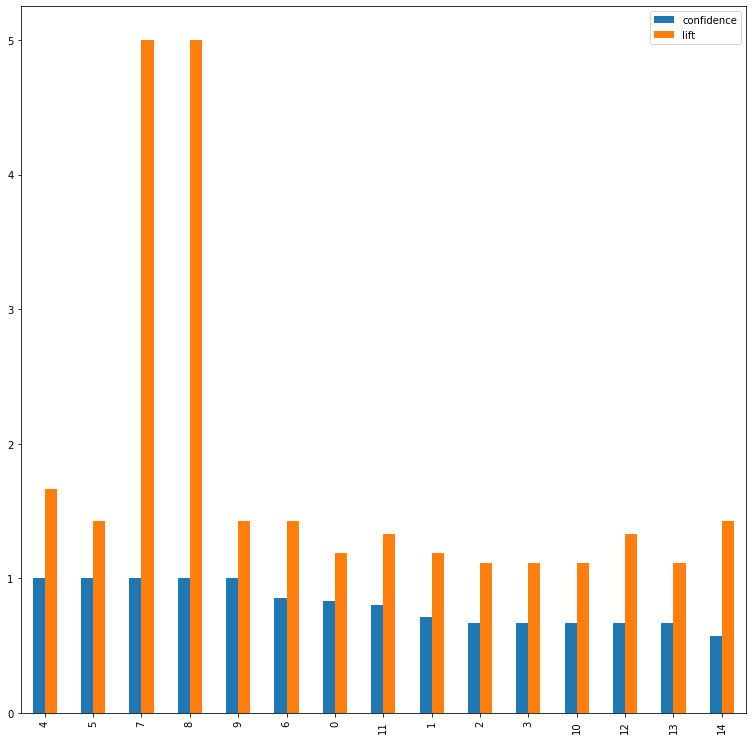

In [79]:

df1.plot.bar()



Text(0.5, 1.0, 'lift vs Confidence')

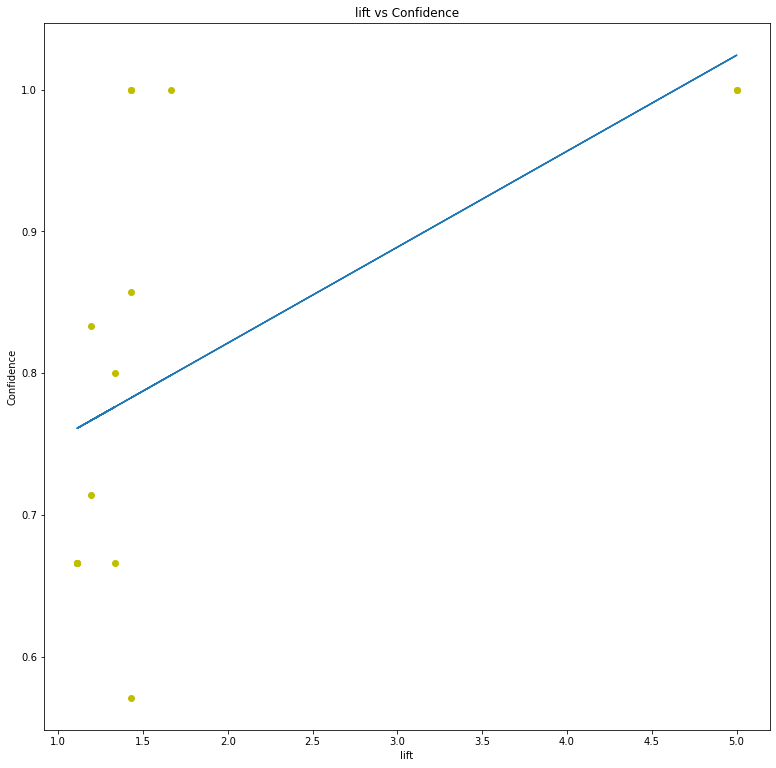

In [82]:


#####  A leverage value of 0 indicates independence. Range will be [-1 1]<br>A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

fig=px.scatter(rules2['support'], rules2['confidence'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="confidence",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Confidence')
    
)
fig.update_layout(hovermode='x unified')
fig.show()

fig=px.scatter(df1['confidence'], df1['lift'])
fig.update_layout(
    xaxis_title="confidence",
    yaxis_title="lift",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('confidence vs lift')
    
)
fig.update_layout(hovermode='x unified')
fig.show()

fig=px.scatter(rules2['support'], rules2['lift'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="lift",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Lift')
    
)
fig.update_layout(hovermode='x unified')
fig.show()

fit = np.polyfit(rules2['lift'], rules2['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules2['lift'], rules2['confidence'], 'yo', rules2['lift'], 
fit_fn(rules2['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')




In [83]:
df1.head()


,movie_group,confidence,lift
4,"('Green Mile',),('Patriot',)",1.0,1.666667
5,"('Patriot',),('Sixth Sense',)",1.0,1.428571
7,"('LOTR1',),('Sixth Sense',)",1.0,5.000000
8,"('LOTR2',),('Sixth Sense',)",1.0,5.000000
9,"('Sixth Sense', 'Patriot'),('Gladiator',)",1.0,1.428571


In [84]:
df1.movie_group.to_list()[0].replace("(","").replace(")","").replace(",","").replace("''"," + ").replace("'","")
movies_ = []
for i in df1.movie_group.to_list():
    #print(i)
    movies_.append(i.replace("(","").replace(")","").replace(",","").replace("''","+").replace("'","").replace(" ", "+").replace("+", " + ")) 

df1["movies"] = movies_
df1



,movie_group,confidence,lift,movies
4,"('Green Mile',),('Patriot',)",1.000000,1.666667,Green + Mile + Patriot
5,"('Patriot',),('Sixth Sense',)",1.000000,1.428571,Patriot + Sixth + Sense
7,"('LOTR1',),('Sixth Sense',)",1.000000,5.000000,LOTR1 + Sixth + Sense
8,"('LOTR2',),('Sixth Sense',)",1.000000,5.000000,LOTR2 + Sixth + Sense
9,"('Sixth Sense', 'Patriot'),('Gladiator',)",1.000000,1.428571,Sixth + Sense + Patriot + Gladiator
6,"('Gladiator',),('Sixth Sense',)",0.857143,1.428571,Gladiator + Sixth + Sense
0,"('Sixth Sense',),('Gladiator',)",0.833333,1.190476,Sixth + Sense + Gladiator
11,"('Sixth Sense', 'Gladiator'),('Gladiator',)",0.800000,1.333333,Sixth + Sense + Gladiator + Gladiator
1,"('Gladiator',),('Sixth Sense',)",0.714286,1.190476,Gladiator + Sixth + Sense
2,"('Sixth Sense',),('Sixth Sense',)",0.666667,1.111111,Sixth + Sense + Sixth + Sense


In [85]:
position=[]
for i in df1.index.values:
    position.append(int(i+1))
    
df1["pos"] = position


df1


,movie_group,confidence,lift,movies,pos
4,"('Green Mile',),('Patriot',)",1.000000,1.666667,Green + Mile + Patriot,5
5,"('Patriot',),('Sixth Sense',)",1.000000,1.428571,Patriot + Sixth + Sense,6
7,"('LOTR1',),('Sixth Sense',)",1.000000,5.000000,LOTR1 + Sixth + Sense,8
8,"('LOTR2',),('Sixth Sense',)",1.000000,5.000000,LOTR2 + Sixth + Sense,9
9,"('Sixth Sense', 'Patriot'),('Gladiator',)",1.000000,1.428571,Sixth + Sense + Patriot + Gladiator,10
6,"('Gladiator',),('Sixth Sense',)",0.857143,1.428571,Gladiator + Sixth + Sense,7
0,"('Sixth Sense',),('Gladiator',)",0.833333,1.190476,Sixth + Sense + Gladiator,1
11,"('Sixth Sense', 'Gladiator'),('Gladiator',)",0.800000,1.333333,Sixth + Sense + Gladiator + Gladiator,12
1,"('Gladiator',),('Sixth Sense',)",0.714286,1.190476,Gladiator + Sixth + Sense,2
2,"('Sixth Sense',),('Sixth Sense',)",0.666667,1.111111,Sixth + Sense + Sixth + Sense,3
